# Author : Siddharth Vashisth 

# Task1 : Prediction using Supervised ML

# GRIP @ The Sparks Foundation

In [3]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



In [4]:
#Reading the data
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#check if there is any null value in database
data.isnull == True

False

### there is no null value in dataset so, we can now visualize our data

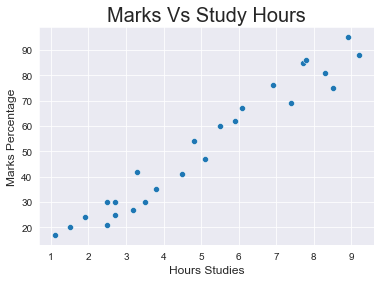

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(y = data['Scores'], x = data['Hours'])
plt.title('Marks Vs Study Hours', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studies',size=12)
plt.show()

### From the above scatter plot there looks to be correlation between the 'Marks Percentage ' and 'Hours Studied', Lets plot a regression line to confirm the correlation. 

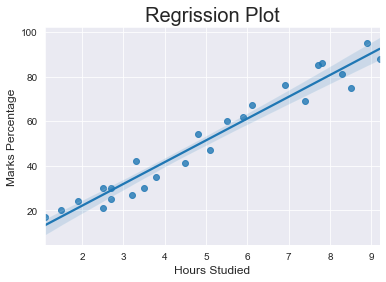

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= data['Hours'],y=data['Scores'])
plt.title('Regrission Plot',size = 20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

### It is confirmed that the variables are positively correlated

## Training the Model

### 1) Splitting the data

In [17]:
#Defining X andY from the data
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#Splitting the data in two
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 0)

## Fitting the data into Model

In [18]:
regression= LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


## Predicting the Percentage of Marks

In [19]:
pred_y = regression.predict(val_X)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_X],"Predicted Marks":[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Markswith the Actual Marks

In [20]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually comparing the Predicted Marks with the Actual Marks 

<function matplotlib.pyplot.show(close=None, block=None)>

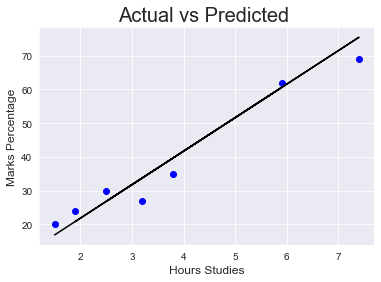

In [21]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted ',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel("Hours Studies",size = 12)
plt.show

## Evaluating the Model

In [22]:
#calculating the accuracy of model
print('Mean absolute error:',mean_absolute_error(val_y,pred_y))

Mean absolute error: 4.130879918502482


### small value of mean absolute error states that chances of error wrong forecasting through the model are very less 

## What will be the predicted score of the student if he/she studies for 9.5 hrs/day?

In [23]:
hours = [9.25]
answer= regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### According to the regression model is a student studies for 9.25 hours a day he/she is likely to score 93.89marks